# Python calculation to be made with the normalized spectra

(Note: because the data are quite big, the full loops will be run Star?)


## 0 Packages and data

In [ ]:
!git clone https://github.com/folsomcp/specpolFlow

Cloning into 'specpolFlow'...
remote: Enumerating objects: 293, done.
remote: Counting objects: 100% (293/293), done.
remote: Compressing objects: 100% (209/209), done.
remote: Total 293 (delta 116), reused 239 (delta 75), pack-reused 0
Receiving objects: 100% (293/293), 6.19 MiB | 17.42 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [ ]:
!git clone https://github.com/folsomcp/LSDpy

Cloning into 'LSDpy'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 37 (delta 18), reused 18 (delta 6), pack-reused 0
Unpacking objects: 100% (37/37), done.


In [ ]:
%cd /content/LSDpy
!ls
import lsdpy
%cd /content

/content/LSDpy
hd219134_19jun16_v_01.spec  lsdpFunc.py			__pycache__
inlsd.dat		    lsdpy.py			README.md
LICENSE			    mask-4500g40-0.1-trim3.dat
/content


In [ ]:
import specpolFlow as pol
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/Shareddrives/BeStarsMiMeS/

/content/drive/Shareddrives/BeStarsMiMeS


## 1. Verifying the listed vsini

### 1.1 Demo with a single observation

In [ ]:
star = 'hd6226'
vsini = 120.0
vradCorrected = -70.0 *u.km/u.s

#star = 'hd7636'
#vsini = 230.0
#vradCorrected = 0 * u.km/u.s

file = 'NormalizedSpectra/{}_1.s'.format(star)
data = pol.iolsd.observation(file)

Text(0.5, 1.0, 'hd7636 observation 1')

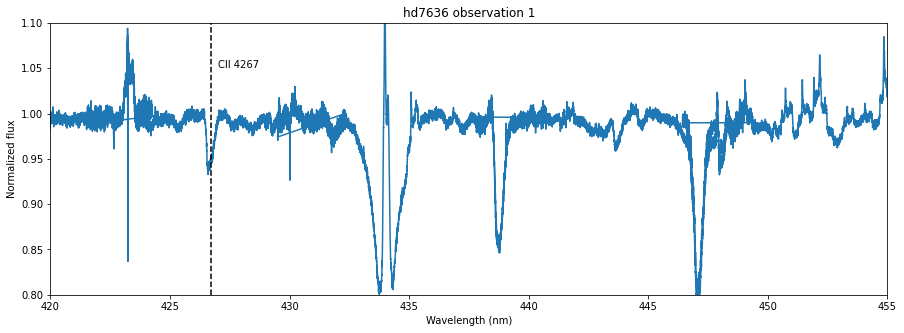

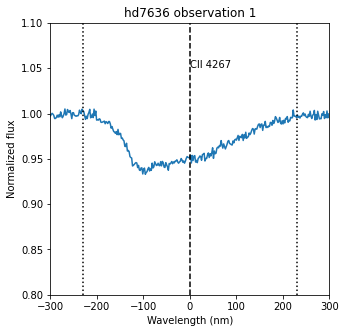

In [ ]:
CII = 426.726 *u.nm

fig, ax = plt.subplots(1,1, figsize=(15,5))

ax.plot(data.wl, data.specI)
ax.set_xlim(420,455)
ax.set_ylim(0.8, 1.1)
ax.axvline(x=CII.value, c='k', ls='--')
ax.text(427, 1.05, 'CII 4267')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Normalized flux')
ax.set_title('{} observation 1'.format(star))

fig, ax = plt.subplots(1,1, figsize=(5,5))

vel = ((data.wl*u.nm - CII)/CII * const.c).to(u.km/u.s)
ax.plot(vel-vradCorrected, data.specI)
ax.set_xlim(-300,300)
ax.set_ylim(0.8, 1.1)
ax.axvline(x=0, c='k', ls='--')
ax.axvline(x=vsini, c='k', ls='dotted')
ax.axvline(x=-1*vsini, c='k', ls='dotted')
ax.text(0, 1.05, 'CII 4267')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Normalized flux')
ax.set_title('{} observation 1'.format(star))


### 1.2 Loop over all star

**TODO**: Make a loop over all the stars. For each star, we want the two plots above on a single page, in a PDF that has one page per star. Only use the first observation for each star. 

I have hardcoded the values for the name of the star, vsini, and vrad for the demostration. But in the loop, you want to take the information from the spreadsheet read into the Panda data frame. 

## 2. Compare Gregg's model to the real data

### 2.1 Demo with a single observation

In [ ]:
star = 'hd6226'
vsini = 120.0
vradCorrected = -70.0 *u.km/u.s

#star = 'hd7636'
#vsini = 230.0
#vradCorrected = 0 * u.km/u.s

file = 'NormalizedSpectra/{}_1.s'.format(star)
data = pol.iolsd.observation(file)

file = 'RanNoise/{}_1_ran_noise'.format(star)
model = pol.iolsd.observation(file)

Text(0.5, 1.0, 'hd6226 observation 1')

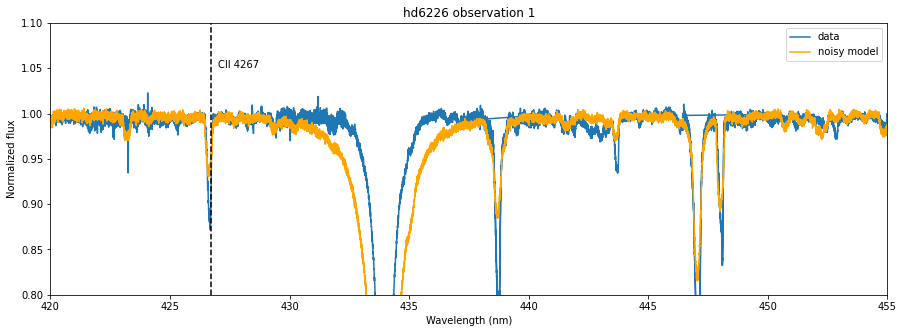

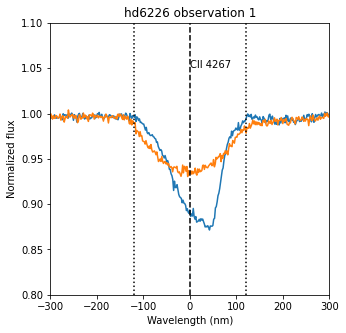

In [ ]:
CII = 426.726 *u.nm
import astropy.units as u
import astropy.constants as const

fig, ax = plt.subplots(1,1, figsize=(15,5))

ax.plot(data.wl, data.specI, label='data')
ax.plot(model.wl, model.specI, c='orange', label='noisy model')
ax.set_xlim(420,455)
ax.set_ylim(0.8, 1.1)
ax.axvline(x=CII.value, c='k', ls='--')
ax.text(427, 1.05, 'CII 4267')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Normalized flux')
ax.set_title('{} observation 1'.format(star))
ax.legend(loc=0)

fig, ax = plt.subplots(1,1, figsize=(5,5))

vel = ((data.wl*u.nm - CII)/CII * const.c).to(u.km/u.s)
ax.plot(vel-vradCorrected, data.specI)

vel = ((model.wl*u.nm - CII)/CII * const.c).to(u.km/u.s)
ax.plot(vel-vradCorrected, model.specI)

ax.set_xlim(-300,300)
ax.set_ylim(0.8, 1.1)
ax.axvline(x=0, c='k', ls='--')
ax.axvline(x=vsini, c='k', ls='dotted')
ax.axvline(x=-1*vsini, c='k', ls='dotted')
ax.text(0, 1.05, 'CII 4267')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Normalized flux')
ax.set_title('{} observation 1'.format(star))

### 2.2 Loop over all star

**TODO**: Make a loop over all the stars. For each star, we want the two plots above on a single page, in a PDF that has one page per star. Only use the first observation for each star. 

I have hardcoded the values for the name of the star, vsini, and vrad for the demostration. But in the loop, you want to take the information from the spreadsheet read into the Panda data frame. 

## 3. Calculate the LSD profiles

### 3.1 Demo with a single observation

> Still work in progress

Modified line mask, removed 39 too closely spaced lines
Average observed spec velocity spacing: 1.806578 km/s
using a 309 point profile with 2.600000 km/s pixels
mean mask depth 0.224114 wl 518.090 Lande 1.140799 (from 334 lines)
mean mask norm weightI 1.120569 weightV 1.071267
saving model spectrum to outModelSpec.dat ...
I reduced chi2 2328.5838 (chi2 226359302.52 constraints 97518 dof 309)
 Rescaling error bars by: 48.255402
V reduced chi2 1.1543 (chi2 112209.42 constraints 97518 dof 309)
 Rescaling error bars by: 1.074389
 removing profile continuum pol: -6.0966e-06 +/- 6.6830e-09 (avg err 8.1688e-05)
N1 reduced chi2 1.1562 (chi2 112396.53 constraints 97518 dof 309)
 Rescaling error bars by: 1.075284
 removing profile continuum pol: -9.0087e-06 +/- 6.6941e-09 (avg err 8.1756e-05)
(possible Stokes I uncertainty underestimate 7.4738e-03 vs 4.0308e-03)
line range estimate -54.199999999996976 -7.399999999996567 km/s
V in line reduced chi^2 4.555241 (chi2  22.776203) 
 detect prob 0.999

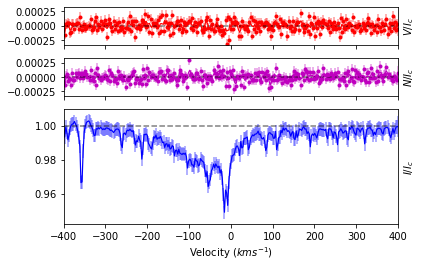

Modified line mask, removed 39 too closely spaced lines
Average observed spec velocity spacing: 1.795169 km/s
using a 309 point profile with 2.600000 km/s pixels
mean mask depth 0.224114 wl 518.090 Lande 1.140799 (from 334 lines)
mean mask norm weightI 1.120569 weightV 1.071267
saving model spectrum to outModelSpec.dat ...
I reduced chi2 629.4898 (chi2 47080803.69 constraints 75101 dof 309)
 Rescaling error bars by: 25.089636
V reduced chi2 0.9956 (chi2 74460.59 constraints 75101 dof 309)
 Not rescaling error bars (scale 0.997782)
 removing profile continuum pol: -2.0455e-06 +/- 8.6591e-09 (avg err 9.2995e-05)
N1 reduced chi2 0.9956 (chi2 74460.59 constraints 75101 dof 309)
 Not rescaling error bars (scale 0.997782)
 removing profile continuum pol: -2.0455e-06 +/- 8.6591e-09 (avg err 9.2995e-05)
line range estimate -139.99999999999773 -7.399999999996567 km/s
V in line reduced chi^2 0.990645 (chi2  49.532261) 
 detect prob 0.507923 (fap 4.920771e-01)
 Non-detection V (fap 4.920771e-01)


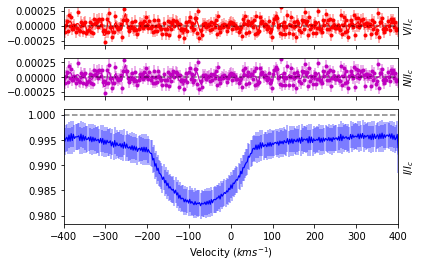

In [ ]:
star = 'hd6226'
obs = '1'
modelcode = 'T15000G40'
# careful, check whether it is g or G in the spreadsheet....
vsini = 120.0
vradCorrected = -70.0 *u.km/u.s


mask = 'Masks/Test/{}_depth0.1.mask'.format(modelcode)

# observations
file = 'NormalizedSpectra/{}_{}.s'.format(star, obs)
outfile = 'LSD/obs_maskdepth0.1/{}_{}.lsd'.format(star,obs)
toto = lsdpy.main(observation=file, mask=mask, outName=outfile, 
           velStart=-400.0, velEnd=400.0, velPixel=2.6, 
           normDepth=0.2, normLande=1.2, normWave=500.0)

# model
file = 'RanNoise/{}_{}_ran_noise'.format(star, obs)
outfile = 'LSD/mod_maskdepth0.1/{}_{}.lsd'.format(star,obs)
toto = lsdpy.main(observation=file, mask=mask, outName=outfile, 
           velStart=-400.0, velEnd=400.0, velPixel=2.6, 
           normDepth=0.2, normLande=1.2, normWave=500.0)
